# Inerpretation-Net

## Specification of Experiment Settings

In [1]:
#######################################################################################################################################
###################################################### CONFIG FILE ####################################################################
#######################################################################################################################################
sleep_time = 0 #minutes


config = {
    'function_family': {
        'maximum_depth': 3,
        'beta': 1,
        'decision_sparsity': -1,
        'fully_grown': True,    
        'dt_type': 'SDT', #'SDT', 'vanilla'
    },
    'data': {
        'number_of_variables': 10, 
        'num_classes': 2,
        'categorical_indices': [],
        
        'use_distribution_list': True,
        # was true with error:
        'random_parameters_distribution': True, ##MAKEPATH DIFFERENT FILES # was true => setting false resolved issue of number_of_lambda_weights error
        'max_distributions_per_class': 1, # None; 0; int >= 1  
        'data_generation_filtering': True,
        'fixed_class_probability': True,
        'weighted_data_generation': False,
        'shift_distrib': False,
        
        'dt_type_train': 'None', # (None, 'vanilla', 'SDT') #### WAS VANILLA ALSO FOR SDT
        'maximum_depth_train': 3, #None or int
        'decision_sparsity_train': 1, #None or int
        
        'function_generation_type': 'distribution',# 'make_classification_distribution', 'make_classification_distribution_trained', 'distribution', 'distribution_trained', 'make_classification', 'make_classification_trained', 'random_decision_tree', 'random_decision_tree_trained'
        'distribution_list': ['uniform', 'normal', 'gamma', 'beta', 'poisson'],#['uniform', 'normal', 'gamma', 'exponential', 'beta', 'binomial', 'poisson'], 
        'distribution_list_eval': ['uniform', 'normal', 'gamma', 'beta', 'poisson'],
        
        'objective': 'classification', # 'regression'
        
        'x_max': 1,
        'x_min': 0,
        'x_distrib': 'uniform', #'normal', 'uniform',       
                
        'lambda_dataset_size': 5000, #number of samples per function
        'number_of_generated_datasets': 10000,
        
        'noise_injected_level': 0, 
        'noise_injected_type': 'flip_percentage', # '' 'normal' 'uniform' 'normal_range' 'uniform_range'
        
        'data_noise': 0, #None or float
        
        'distrib_param_max': 5,
    }, 
    'lambda_net': {
        'epochs_lambda': 1000,
        'early_stopping_lambda': True, 
        'early_stopping_min_delta_lambda': 1e-3,
        'batch_lambda': 64,
        'dropout_lambda': 0,
        'lambda_network_layers': [128],
        'use_batchnorm_lambda': False,
        
        'optimizer_lambda': 'adam',
        'loss_lambda': 'binary_crossentropy', #categorical_crossentropy
        
        'number_of_lambda_weights': None,
        
        'number_initializations_lambda': 1, 
        
        'number_of_trained_lambda_nets': 10000,
    },     
    
    'i_net': {
        #'dense_layers': [1024, 1024, 256, 2048, 2048],
        'dense_layers': [1792, 512, 512],
        #'dense_layers': [704], #SDT-1 n=15
        #'dense_layers': [512, 512, 512], #vanilla n=15 BEST for 15 and 32 on real-world
        #'dense_layers': [512, 512, 512], #SDT-1 n=32
        #'dense_layers': [512, 512, 512], #vanilla n=32        
        
        #'dropout': [0, 0, 0, 0, 0.3],#[0.3, 0.3, 0.3, 0.3, 0.3],
        'dropout': [0, 0, 0.5],
        #'dropout': [0], #SDT-1 n=15
        #'dropout': [0.3, 0, 0], #vanilla n=15 BEST for 15 and 32 on real-world
        #'dropout': [0, 0, 0], #SDT-1 n=32
        #'dropout': [0.5, 0, 0], #vanilla n=32

        #'hidden_activation': 'relu',
        'hidden_activation': 'sigmoid',
        #'hidden_activation': ['sigmoid'], #SDT-1 n=15
        #'hidden_activation': ['sigmoid', 'tanh', 'sigmoid'], #vanilla n=15 BEST for 15 and 32 on real-world
        #'hidden_activation': ['sigmoid', 'tanh', 'tanh'], #SDT-1 n=32
        #'hidden_activation': ['sigmoid', 'tanh', 'sigmoid'], #vanilla n=32
        
        #'optimizer': 'rmsprop', 
        'optimizer': 'adam', 
        #'optimizer': 'adam', #SDT-1 n=15
        #'optimizer': 'adam', #vanilla n=15  BEST for 15 and 32 on real-world
        #'optimizer': 'adam', #SDT-1 n=32
        #'optimizer': 'adam', #vanilla n=32
        
        #'learning_rate': 0.001,
        'learning_rate': 0.001,
        #'learning_rate': 0.001, #SDT-1 n=15
        #'learning_rate': 0.001, #vanilla n=15 BEST for 15 and 32 on real-world
        #'learning_rate': 0.001, #SDT-1 n=32
        #'learning_rate': 0.001, #vanilla n=32
        
        'separate_weight_bias': False,
        
        'convolution_layers': None,
        'lstm_layers': None,        
        'additional_hidden': False,
        
        'loss': 'binary_crossentropy', #mse; binary_crossentropy; 'binary_accuracy'
        'metrics': ['binary_accuracy'], #soft_ or _penalized
        
        'epochs': 150, # standard 500
        'early_stopping': True,
        'batch_size': 256,

        'interpretation_dataset_size': 10000,
                
        'test_size': 10, #Float for fraction, Int for number 0
        'evaluate_distribution': True,
        'force_evaluate_real_world': False,
        
        'function_representation_type': 1, # 1=standard representation; 2=sparse representation with classification for variables; 3=softmax to select classes (n top probabilities)
        'normalize_lambda_nets': False,

        'optimize_decision_function': True, #False
        'function_value_loss': True, #False
                      
        'data_reshape_version': None, #default to 2 options:(None, 0,1 2,3) #3=autoencoder dimensionality reduction
        
        'nas': False,
        'nas_type': 'SEQUENTIAL', #options:(None, 'SEQUENTIAL', 'CNN', 'LSTM', 'CNN-LSTM', 'CNN-LSTM-parallel')      
        'nas_trials': 60,
        'nas_optimizer': 'greedy' #'hyperband',#"bayesian",'greedy', 'random'
    },  
    
    'single_real_world':{
        'extension_rate': 1,
        'initial_parameters': 1024*2,
        
        'mutation_type': 'range_normal_add',
        'rna_distributions': 'normal', # 'normal', 'uniform'(not implemented)
        'mutation_number': 50,
        
        'percentage_extended_mutation_from_standard': 0.33, # percentage of lambda nets that are mutated from the base net in later rounds
        'increase_mutation_number_extended_from_standard': 1, # multiplier for the number of mutations in nets that are mutated from base net
        'increase_mutation_range_extended_from_standard': 1.5, # multiplier for the severity of the mutations made from base net
        
        'increase_interval_base': 20,
    },
    
    'evaluation': {   
        #'inet_holdout_seed_evaluation': False,
        
        'number_of_random_evaluations_per_distribution': 5,
            
        'random_evaluation_dataset_size': 500, 
        'random_evaluation_dataset_distribution': 'uniform', 
        
        'per_network_optimization_dataset_size': 5000,

        #'sklearn_dt_benchmark': False,
        #'sdt_benchmark': False,
        
        'different_eval_data': False,
        
        'eval_data_description': {
            ######### data #########
            'eval_data_function_generation_type': 'make_classification',
            'eval_data_lambda_dataset_size': 5000, #number of samples per function
            'eval_data_noise_injected_level': 0, 
            'eval_data_noise_injected_type': 'flip_percentage', # '' 'normal' 'uniform' 'normal_range' 'uniform_range'     
            ######### lambda_net #########
            'eval_data_number_of_trained_lambda_nets': 100,
            ######### i_net #########
            'eval_data_interpretation_dataset_size': 100,
            
        }
        
    },    
    
    'computation':{
        'load_model': False,
        'n_jobs': 10,
        'use_gpu': False,
        'gpu_numbers': '2',
        'RANDOM_SEED': 42,   
        'verbosity': 0
    }
}


### Imports

In [2]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['i_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

In [3]:
#######################################################################################################################################
##################################################### IMPORT LIBRARIES ################################################################
#######################################################################################################################################
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import logging

import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(3)

from itertools import product       
from tqdm.notebook import tqdm
import pickle
import numpy as np
import pandas as pd
import scipy as sp
import timeit
import psutil

from functools import reduce
from more_itertools import random_product 
from sklearn.preprocessing import Normalizer

import sys
import shutil

from copy import deepcopy
import math
import random 


import time
from datetime import datetime
from collections.abc import Iterable


from joblib import Parallel, delayed

from scipy.integrate import quad

from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold, ParameterGrid, ParameterSampler
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, f1_score, mean_absolute_error, r2_score, log_loss
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import tensorflow.keras.backend as K
from livelossplot import PlotLossesKerasTF
#from keras_tqdm import TQDMNotebookCallback

from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.display import display, Math, Latex, clear_output

from prettytable import PrettyTable

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import xgboost as xgb



In [4]:
tf.__version__

'2.8.0'

In [5]:
#######################################################################################################################################
################################################### VARIABLE ADJUSTMENTS ##############################################################
#######################################################################################################################################

config['i_net']['data_reshape_version'] = 2 if data_reshape_version == None and (convolution_layers != None or lstm_layers != None or (nas and nas_type != 'SEQUENTIAL')) else data_reshape_version
config['function_family']['decision_sparsity'] = config['function_family']['decision_sparsity'] if config['function_family']['decision_sparsity'] != -1 else config['data']['number_of_variables'] 

#######################################################################################################################################
###################################################### SET VARIABLES + DESIGN #########################################################
#######################################################################################################################################

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
os.environ['CUDA_VISIBLE_DEVICES'] = gpu_numbers if use_gpu else ''
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true' if use_gpu else ''

#os.environ['XLA_FLAGS'] =  '--xla_gpu_cuda_data_dir=/usr/local/cuda-10.1'

#os.environ['XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/local/cuda-11.4' if use_gpu else ''#-10.1' #--xla_gpu_cuda_data_dir=/usr/local/cuda, 
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2 ,--tf_xla_enable_xla_devices' if use_gpu else ''#'--tf_xla_auto_jit=2' #, --tf_xla_enable_xla_devices


sns.set_style("darkgrid")

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
if int(tf.__version__[0]) >= 2:
    tf.random.set_seed(RANDOM_SEED)
else:
    tf.set_random_seed(RANDOM_SEED)
    
    
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 200)
np.set_printoptions(threshold=200)
np.set_printoptions(suppress=True)



In [6]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

In [7]:
from utilities.InterpretationNet import *
from utilities.LambdaNet import *
from utilities.metrics import *
from utilities.utility_functions import *
from utilities.DecisionTree_BASIC import *

#######################################################################################################################################
####################################################### CONFIG ADJUSTMENTS ############################################################
#######################################################################################################################################

config['lambda_net']['number_of_lambda_weights'] = get_number_of_lambda_net_parameters(config)
config['function_family']['basic_function_representation_length'] = get_number_of_function_parameters(dt_type, maximum_depth, number_of_variables, num_classes)
config['function_family']['function_representation_length'] = ( 
       #((2 ** maximum_depth - 1) * decision_sparsity) * 2 + (2 ** maximum_depth - 1) + (2 ** maximum_depth) * num_classes  if function_representation_type == 1 and dt_type == 'SDT'
       (2 ** maximum_depth - 1) * (number_of_variables + 1) + (2 ** maximum_depth) * num_classes if function_representation_type == 1 and dt_type == 'SDT'
  else (2 ** maximum_depth - 1) * decision_sparsity + (2 ** maximum_depth - 1) + ((2 ** maximum_depth - 1)  * decision_sparsity * number_of_variables) + (2 ** maximum_depth) * num_classes if function_representation_type == 2 and dt_type == 'SDT'
  else ((2 ** maximum_depth - 1) * decision_sparsity) * 2 + (2 ** maximum_depth)  if function_representation_type == 1 and dt_type == 'vanilla'
  else (2 ** maximum_depth - 1) * decision_sparsity + ((2 ** maximum_depth - 1)  * decision_sparsity * number_of_variables) + (2 ** maximum_depth) if function_representation_type == 2 and dt_type == 'vanilla'
  else ((2 ** maximum_depth - 1) * number_of_variables * 2) + (2 ** maximum_depth)  if function_representation_type == 3 and dt_type == 'vanilla'
  else ((2 ** maximum_depth - 1) * number_of_variables * 2) + (2 ** maximum_depth - 1) + (2 ** maximum_depth) * num_classes if function_representation_type == 3 and dt_type == 'SDT'
  else None
                                                            )
#######################################################################################################################################
################################################## UPDATE VARIABLES ###################################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['i_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

#initialize_LambdaNet_config_from_curent_notebook(config)
#initialize_metrics_config_from_curent_notebook(config)
#initialize_utility_functions_config_from_curent_notebook(config)
#initialize_InterpretationNet_config_from_curent_notebook(config)


#######################################################################################################################################
###################################################### PATH + FOLDER CREATION #########################################################
#######################################################################################################################################
globals().update(generate_paths(config, path_type='interpretation_net'))

create_folders_inet(config)

#######################################################################################################################################
############################################################ SLEEP TIMER ##############################################################
#######################################################################################################################################
sleep_minutes(sleep_time)  

In [8]:
print(path_identifier_interpretation_net)

print(path_identifier_lambda_net_data)


lNetSize5000_numLNets10000_var10_class2_distribution_xMax1_xMin0_xDistuniform_dNoise0_randParamDist_maxDistClass1_distribParamMax5_filterGenun-no-ga-be-po_depth3_beta1_decisionSpars1_None_fullyGrown/128_e1000ES0.001_b64_drop0_adam_binary_crossentropy_fixedInit1-seed42/inet_dense1792-512-512_drop0-0-0.5e150b256_adam_funcRep1_reshapeNone
lNetSize5000_numLNets10000_var10_class2_distribution_xMax1_xMin0_xDistuniform_dNoise0_randParamDist_maxDistClass1_distribParamMax5_filterGenun-no-ga-be-po_depth3_beta1_decisionSpars1_None_fullyGrown/128_e1000ES0.001_b64_drop0_adam_binary_crossentropy_fixedInit1-seed42


In [9]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num XLA-GPUs Available: ", len(tf.config.experimental.list_physical_devices('XLA_GPU')))

Num GPUs Available:  0
Num XLA-GPUs Available:  0


## Load Data and Generate Datasets

In [10]:
print(config['function_family']['basic_function_representation_length'] )

93


In [11]:
lambda_net_eval = False

In [12]:
#%load_ext autoreload
#%autoreload 2

In [13]:
def load_lambda_nets(config, no_noise=False, n_jobs=1):
    
    #def generate_lambda_net()
    
    #if psutil.virtual_memory().percent > 80:
        #raise SystemExit("Out of RAM!")
    
    if no_noise==True:
        config['data']['noise_injected_level'] = 0
    path_dict = generate_paths(config, path_type='interpretation_net')        
        
    directory = './data/weights/' + 'weights_' + path_dict['path_identifier_lambda_net_data'] + '/'
    path_network_parameters = directory + 'weights' + '.txt'
    
    
    #path_X_data = directory + 'X_test_lambda.txt'
    #path_y_data = directory + 'y_test_lambda.txt'
    
    if True:
        path_X_data = './data/saved_function_lists/X_data_' + path_dict['path_identifier_function_data'] + '.pkl'
        with open(path_X_data, 'rb') as f:
            X_data_list = pickle.load(f)

        path_y_data = './data/saved_function_lists/y_data_' + path_dict['path_identifier_function_data'] + '.pkl'
        with open(path_y_data, 'rb') as f:
            y_data_list = pickle.load(f)        
            
    path_distribution_parameters = directory + '/' + 'distribution_parameters' + '.txt'
    
    network_parameters = pd.read_csv(path_network_parameters, sep=",", header=None)
    network_parameters = network_parameters.sort_values(by=0)
    
    try:
        distribution_parameters = pd.read_csv(path_distribution_parameters, sep=",", header=None)
        distribution_parameters = distribution_parameters.sort_values(by=0)
    except:
        distribution_parameters = pd.DataFrame([None] * network_parameters.shape[0])
    
    #if no_noise == False:
    #    network_parameters = network_parameters.sample(n=config['i_net']['interpretation_dataset_size'], random_state=config['computation']['RANDOM_SEED'])
    #    distribution_parameters = distribution_parameters.sample(n=config['i_net']['interpretation_dataset_size'], random_state=config['computation']['RANDOM_SEED'])
        
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky') #loky

    lambda_nets = parallel(delayed(LambdaNet)(network_parameters_row, 
                                              distribution_parameters_row,
                                              #X_test_lambda_row, 
                                              #y_test_lambda_row, 
                                              X_test_network[1].values,
                                              y_test_network[1].values,
                                              config) for X_test_network, y_test_network, network_parameters_row, distribution_parameters_row in zip(X_data_list[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     y_data_list[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     network_parameters.values[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     distribution_parameters.values[:config['i_net']['interpretation_dataset_size']]))        
    del parallel
    
    base_model = generate_base_model(config)  
                
    lambda_net_dataset = LambdaNetDataset(lambda_nets)
        
    return lambda_net_dataset
    

In [14]:
#LOAD DATA
if lambda_net_eval:
    if different_eval_data:
        config_train = deepcopy(config)
        config_eval = deepcopy(config)

        config_eval['data']['function_generation_type'] = config['evaluation']['eval_data_description']['eval_data_function_generation_type']
        config_eval['data']['lambda_dataset_size'] = config['evaluation']['eval_data_description']['eval_data_lambda_dataset_size']
        config_eval['data']['noise_injected_level'] = config['evaluation']['eval_data_description']['eval_data_noise_injected_level']
        config_eval['data']['noise_injected_type'] = config['evaluation']['eval_data_description']['eval_data_noise_injected_type'] 
        config_eval['lambda_net']['number_of_trained_lambda_nets'] = config['evaluation']['eval_data_description']['eval_data_number_of_trained_lambda_nets']   
        config_eval['i_net']['interpretation_dataset_size'] = config['evaluation']['eval_data_description']['eval_data_interpretation_dataset_size']   


        lambda_net_dataset_train = load_lambda_nets(config_train, n_jobs=n_jobs)
        lambda_net_dataset_eval = load_lambda_nets(config_eval, n_jobs=n_jobs)

        if test_size > 0 and not evaluate_distribution:
            lambda_net_dataset_valid, lambda_net_dataset_test = split_LambdaNetDataset(lambda_net_dataset_eval, test_split=test_size)   
        else:
            lambda_net_dataset_test = None
            lambda_net_dataset_valid = lambda_net_dataset_eval

    else:
        lambda_net_dataset = load_lambda_nets(config, n_jobs=n_jobs)

        if test_size > 0 and not evaluate_distribution:
            lambda_net_dataset_train_with_valid, lambda_net_dataset_test = split_LambdaNetDataset(lambda_net_dataset, test_split=test_size)
            lambda_net_dataset_train, lambda_net_dataset_valid = split_LambdaNetDataset(lambda_net_dataset_train_with_valid, test_split=0.1)    
        else:
            lambda_net_dataset_train, lambda_net_dataset_valid = split_LambdaNetDataset(lambda_net_dataset, test_split=0.1)    
            lambda_net_dataset_test = None

### Data Inspection

In [15]:
if lambda_net_eval:
    print(lambda_net_dataset_train.shape)
    print(lambda_net_dataset_valid.shape)
    if test_size > 0 and not evaluate_distribution:
        print(lambda_net_dataset_test.shape)

In [16]:
if lambda_net_eval:
    lambda_net_dataset_valid.as_pandas(config).head()

In [17]:
if lambda_net_eval:
    lambda_net_dataset_train.samples_class_0_list_array[1]

In [18]:
if lambda_net_eval:
    lambda_net_dataset_train.distribution_dict_row_array[1]

In [19]:
if lambda_net_eval:
    lambda_net_dataset_train.distribution_dict_list_list[1]

## INet Training Definition

In [20]:
def generate_inet(config, input_size, x_data_points):
    ##### NEED TO ADJUST THIS GENERATION AS IT DOESN'T SUPPORT FUNCTION TYPE 3

    callback_names = []

    ############################## DATA PREPARATION ###############################

    random_model = generate_base_model(config)
    #random_evaluation_dataset =  np.random.uniform(low=0, high=0.2, size=(config['evaluation']['random_evaluation_dataset_size'], config['data']['number_of_variables']))
    np.random.seed(RANDOM_SEED)
    random_evaluation_dataset = x_data_points
    # random_evaluation_dataset =  np.random.uniform(low=config['data']['x_min'], high=config['data']['x_max'], size=(config['evaluation']['random_evaluation_dataset_size'], config['data']['number_of_variables']))
    #  Datenpunkte zum überprüfen
    random_network_parameters = random_model.get_weights()
    network_parameters_structure = [network_parameter.shape for network_parameter in random_network_parameters]         

    #(X_train, X_train_flat, y_train) = generate_inet_train_data(lambda_net_dataset_train, config)
    #(X_valid, X_valid_flat, y_valid) = generate_inet_train_data(lambda_net_dataset_valid, config)
    #(X_test, X_test_flat, y_test) = generate_inet_train_data(lambda_net_dataset_test, config)

    ############################## OBJECTIVE SPECIFICATION AND LOSS FUNCTION ADJUSTMENTS ###############################     
    # Reihenfolge Methodenaufruf Übergabeparameter geändert
    loss_function = inet_decision_function_fv_loss_wrapper(random_evaluation_dataset, random_model, network_parameters_structure, config)
    #loss_function = inet_decision_function_fv_loss_wrapper(random_evaluation_dataset, network_parameters_structure, config, random_model)
    metrics = [
               # Reihenfolge Methodenaufruf Übergabeparameter geändert NOT SURE IF PARAMS ARE RIGHT
               inet_decision_function_fv_metric_wrapper(random_model, network_parameters_structure, config, 'binary_crossentropy', random_evaluation_dataset), 
               #inet_decision_function_fv_metric_wrapper(random_evaluation_dataset, random_model, network_parameters_structure, config, 'binary_crossentropy'), 
               #inet_decision_function_fv_metric_wrapper(random_evaluation_dataset, random_model, network_parameters_structure, config, 'mae'), 
               # Reihenfolge Methodenaufruf Übergabeparameter geändert NOT SURE IF PARAMS ARE RIGHT
               #inet_decision_function_fv_metric_wrapper(random_evaluation_dataset, random_model, network_parameters_structure, config, 'binary_accuracy')
               inet_decision_function_fv_metric_wrapper(random_model, network_parameters_structure, config, 'binary_accuracy', random_evaluation_dataset)
    ]

    ############################## BUILD MODEL ###############################

    #inputs = Input(shape=number_of_lambda_weights, name='input')
    inputs = Input(shape=input_size, name='input')
    
    hidden = tf.keras.layers.Dense(config['i_net']['dense_layers'][0], name='hidden1_' + str(config['i_net']['dense_layers'][0]))(inputs)
    hidden = tf.keras.layers.Activation(activation='relu', name='activation1_' + 'relu')(hidden)

    if config['i_net']['dropout'][0] > 0:
        hidden = tf.keras.layers.Dropout(config['i_net']['dropout'][0], name='dropout1_' + str(config['i_net']['dropout'][0]))(hidden)

    for layer_index, neurons in enumerate(config['i_net']['dense_layers'][1:]):
        hidden = tf.keras.layers.Dense(neurons, name='hidden' + str(layer_index+2) + '_' + str(neurons))(hidden)
        hidden = tf.keras.layers.Activation(activation='relu', name='activation'  + str(layer_index+2) + '_relu')(hidden)

        if config['i_net']['dropout'][layer_index+1] > 0:
            hidden = tf.keras.layers.Dropout(config['i_net']['dropout'][layer_index+1], name='dropout' + str(layer_index+2) + '_' + str(config['i_net']['dropout'][layer_index+1]))(hidden)


    if config['i_net']['function_representation_type'] == 1:
        if config['function_family']['dt_type'] == 'SDT':
            outputs = tf.keras.layers.Dense(config['function_family']['function_representation_length'], name='output_' + str(config['function_family']['function_representation_length']))(hidden)
        elif config['function_family']['dt_type'] == 'vanilla':
            internal_node_num_ = 2 ** config['function_family']['maximum_depth'] - 1 
            leaf_node_num_ = 2 ** config['function_family']['maximum_depth']                    

            outputs_coeff = tf.keras.layers.Dense(internal_node_num_ * config['function_family']['decision_sparsity'], activation='sigmoid', name='outputs_coeff_' + str(internal_node_num_ * config['function_family']['decision_sparsity']))(hidden)        
            outputs_index = tf.keras.layers.Dense(internal_node_num_ * config['function_family']['decision_sparsity'], activation='linear', name='outputs_index_' + str(internal_node_num_ * config['function_family']['decision_sparsity']))(hidden)      
            outputs_leaf = tf.keras.layers.Dense(leaf_node_num_, activation='sigmoid', name='outputs_leaf_' + str(leaf_node_num_))(hidden) 

            outputs = concatenate([outputs_coeff, outputs_index, outputs_leaf], name='output_combined')

    elif config['i_net']['function_representation_type'] == 2:
        if config['function_family']['dt_type'] == 'SDT':

            #input_dim = config['data']['number_of_variables']
            #output_dim = config['data']['num_classes']
            internal_node_num_ = 2 ** config['function_family']['maximum_depth'] - 1 
            leaf_node_num_ = 2 ** config['function_family']['maximum_depth']

            number_output_coefficients = internal_node_num_ * config['function_family']['decision_sparsity']

            outputs_coeff = tf.keras.layers.Dense(number_output_coefficients, name='output_coeff_' + str(number_output_coefficients))(hidden)

            outputs_list = [outputs_coeff]

            for outputs_index in range(internal_node_num_):
                for var_index in range(config['function_family']['decision_sparsity']):
                    output_name = 'output_identifier' + str(outputs_index+1) + '_var' + str(var_index+1) + '_' + str(config['function_family']['decision_sparsity'])
                    outputs_identifer = tf.keras.layers.Dense(config['data']['number_of_variables'], activation='softmax', name=output_name)(hidden)
                    outputs_list.append(outputs_identifer)    

            outputs_bias = tf.keras.layers.Dense(internal_node_num_, name='output_bias_' + str(internal_node_num_))(hidden)
            outputs_list.append(outputs_bias)     

            outputs_leaf_nodes = tf.keras.layers.Dense(leaf_node_num_ * config['data']['num_classes'], name='output_leaf_nodes_' + str(leaf_node_num_ * config['data']['num_classes']))(hidden)
            outputs_list.append(outputs_leaf_nodes)     

            outputs = concatenate(outputs_list, name='output_combined')


        elif config['function_family']['dt_type'] == 'vanilla':
            #input_dim = config['data']['number_of_variables']
            #output_dim = config['data']['num_classes']
            internal_node_num_ = 2 ** config['function_family']['maximum_depth'] - 1 
            leaf_node_num_ = 2 ** config['function_family']['maximum_depth']

            number_output_coefficients = internal_node_num_ * config['function_family']['decision_sparsity']

            outputs_coeff = tf.keras.layers.Dense(number_output_coefficients, activation='sigmoid', name='output_coeff_' + str(number_output_coefficients))(hidden)
            outputs_list = [outputs_coeff]
            for outputs_index in range(internal_node_num_):
                for var_index in range(config['function_family']['decision_sparsity']):
                    output_name = 'output_identifier' + str(outputs_index+1) + '_var' + str(var_index+1) + '_' + str(config['function_family']['decision_sparsity'])
                    outputs_identifer = tf.keras.layers.Dense(config['data']['number_of_variables'], activation='softmax', name=output_name)(hidden)
                    outputs_list.append(outputs_identifer)    

            for leaf_node in range(leaf_node_num_):
                #outputs_leaf_nodes = tf.keras.layers.Dense(config['data']['num_classes'], activation='softmax', name='output_leaf_node_' + str(leaf_node))(hidden)
                outputs_leaf_nodes = tf.keras.layers.Dense(1, activation='sigmoid', name='output_leaf_node_' + str(leaf_node))(hidden)
                outputs_list.append(outputs_leaf_nodes)    

            outputs = concatenate(outputs_list, name='output_combined')



    inet_base_model = Model(inputs=inputs, outputs=outputs)          

    optimizer = config['i_net']['optimizer']
    if optimizer == "custom":
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

    inet_base_model.compile(optimizer=optimizer,
                  loss=loss_function,
                  metrics=metrics,
                 )

    return inet_base_model

In [21]:
def generate_inet_v2(config, input_size, X_data_points):
    
    callback_names = []
    
    ############################## DATA PREPARATION ###############################

#     config['lambda_net']['number_of_lambda_weights'] = get_number_of_lambda_net_parameters(config)
#     config['function_family']['basic_function_representation_length'] = get_number_of_function_parameters(dt_type, maximum_depth, number_of_variables, num_classes)
#     config['function_family']['function_representation_length'] = ( 
#            #((2 ** maximum_depth - 1) * decision_sparsity) * 2 + (2 ** maximum_depth - 1) + (2 ** maximum_depth) * num_classes  if function_representation_type == 1 and dt_type == 'SDT'
#            (2 ** maximum_depth - 1) * (number_of_variables + 1) + (2 ** maximum_depth) * num_classes if function_representation_type == 1 and dt_type == 'SDT'
#       else (2 ** maximum_depth - 1) * decision_sparsity + (2 ** maximum_depth - 1) + ((2 ** maximum_depth - 1)  * decision_sparsity * number_of_variables) + (2 ** maximum_depth) * num_classes if function_representation_type == 2 and dt_type == 'SDT'
#       else ((2 ** maximum_depth - 1) * decision_sparsity) * 2 + (2 ** maximum_depth)  if function_representation_type == 1 and dt_type == 'vanilla'
#       else (2 ** maximum_depth - 1) * decision_sparsity + ((2 ** maximum_depth - 1)  * decision_sparsity * number_of_variables) + (2 ** maximum_depth) if function_representation_type == 2 and dt_type == 'vanilla'
#       else ((2 ** maximum_depth - 1) * number_of_variables * 2) + (2 ** maximum_depth)  if function_representation_type == 3 and dt_type == 'vanilla'
#       else ((2 ** maximum_depth - 1) * number_of_variables * 2) + (2 ** maximum_depth - 1) + (2 ** maximum_depth) * num_classes if function_representation_type == 3 and dt_type == 'SDT'
#       else None)
    
    #input_size = config['lambda_net']['number_of_lambda_weights']
    
    random_model = generate_base_model(config)
    #random_evaluation_dataset =  np.random.uniform(low=0, high=0.2, size=(config['evaluation']['random_evaluation_dataset_size'], config['data']['number_of_variables']))
    np.random.seed(RANDOM_SEED)
    random_evaluation_dataset = X_data_points
    # random_evaluation_dataset =  np.random.uniform(low=config['data']['x_min'], high=config['data']['x_max'], size=(config['evaluation']['random_evaluation_dataset_size'], config['data']['number_of_variables']))
    #  Datenpunkte zum überprüfen
    random_network_parameters = random_model.get_weights()
    network_parameters_structure = [network_parameter.shape for network_parameter in random_network_parameters]         

    #(X_train, X_train_flat, y_train) = generate_inet_train_data(lambda_net_dataset_train, config)
    #(X_valid, X_valid_flat, y_valid) = generate_inet_train_data(lambda_net_dataset_valid, config)
    #(X_test, X_test_flat, y_test) = generate_inet_train_data(lambda_net_dataset_test, config)

    ############################## OBJECTIVE SPECIFICATION AND LOSS FUNCTION ADJUSTMENTS ###############################     
    # Reihenfolge Methodenaufruf Übergabeparameter geändert
    try:
        use_distribution_list = config['data']['use_distribution_list'] if config['data']['max_distributions_per_class'] is not None else False
    except:
        use_distribution_list = False if config['data']['max_distributions_per_class'] is None else True
    
    
    # TODO Datenpunkte in loss bringen
    
    
    #loss_function = inet_decision_function_fv_loss_wrapper(random_evaluation_dataset, random_model, network_parameters_structure, config)  # old code
    #loss_function = inet_decision_function_fv_loss_wrapper(random_evaluation_dataset, random_model, config, network_parameters_structure)  # new version 1
    #loss_function = inet_decision_function_fv_loss_wrapper(random_evaluation_dataset, network_parameters_structure, config, random_model)  # new version 2
    loss_function = inet_decision_function_fv_loss_wrapper(random_model, network_parameters_structure, config, use_distribution_list)  # new version 3
    metrics = [
               # Reihenfolge Methodenaufruf Übergabeparameter geändert NOT SURE IF PARAMS ARE RIGHT
               #inet_decision_function_fv_metric_wrapper(random_model, network_parameters_structure, config, 'binary_crossentropy', random_evaluation_dataset), 
               inet_decision_function_fv_metric_wrapper(random_model, network_parameters_structure, config, 'binary_crossentropy', use_distribution_list), # test
               #inet_decision_function_fv_metric_wrapper(random_evaluation_dataset, random_model, network_parameters_structure, config, 'binary_crossentropy'), 
               #inet_decision_function_fv_metric_wrapper(random_evaluation_dataset, random_model, network_parameters_structure, config, 'mae'), 
               # Reihenfolge Methodenaufruf Übergabeparameter geändert NOT SURE IF PARAMS ARE RIGHT
               #inet_decision_function_fv_metric_wrapper(random_evaluation_dataset, random_model, network_parameters_structure, config, 'binary_accuracy')
               #inet_decision_function_fv_metric_wrapper(random_model, network_parameters_structure, config, 'binary_accuracy', random_evaluation_dataset)
               inet_decision_function_fv_metric_wrapper(random_model, network_parameters_structure, config, 'binary_accuracy', use_distribution_list) # test
    ]

    if not isinstance(config['i_net']['hidden_activation'], list):
        config['i_net']['hidden_activation'] = [config['i_net']['hidden_activation'] for _ in range(len(config['i_net']['dense_layers']))]

    if config['i_net']['separate_weight_bias']:
        print('separate_weight_bias')
        if False:
            inputs_weight = Input(shape=weight_count, 
                       name='input_weight')
            inputs_bias = Input(shape=bias_count, 
                       name='input_bias')


            inputs = [inputs_bias, inputs_weight]
        else:
            inputs = Input(shape=input_size, 
                       name='input')                    

        inputs_bias = crop(1, 0, bias_count)(inputs)
        inputs_weight = crop(1, 0, bias_count)(inputs)#crop(1, bias_count, bias_count+weight_count)(inputs)

        hidden_weight = tf.keras.layers.Dense(config['i_net']['dense_layers'][0], 
                                       name='hidden1_weight_' + str(config['i_net']['dense_layers'][0]))(inputs_weight)
        hidden_weight = tf.keras.layers.Activation(activation=config['i_net']['hidden_activation'][0],  
                                            name='activation1_weight_' + config['i_net']['hidden_activation'][0])(hidden_weight)

        hidden_bias = tf.keras.layers.Dense(config['i_net']['dense_layers'][0], 
                                       name='hidden1_bias_' + str(config['i_net']['dense_layers'][0]))(inputs_bias)
        hidden_bias = tf.keras.layers.Activation(activation=config['i_net']['hidden_activation'][0],  
                                            name='activation1_bias_' + config['i_net']['hidden_activation'][0])(hidden_bias)


        if config['i_net']['dropout'][0] > 0:
            hidden_weight = tf.keras.layers.Dropout(config['i_net']['dropout'][0], 
                                             name='dropout1_weight_' + str(config['i_net']['dropout'][0]))(hidden_weight)

            hidden_bias = tf.keras.layers.Dropout(config['i_net']['dropout'][0], 
                                             name='dropout1_bias_' + str(config['i_net']['dropout'][0]))(hidden_bias)

        for layer_index, neurons in enumerate(config['i_net']['dense_layers'][1:]):
            hidden_weight = tf.keras.layers.Dense(neurons, 
                                           name='hidden_weight' + str(layer_index+2) + '_' + str(neurons))(hidden_weight)
            hidden_weight = tf.keras.layers.Activation(activation=config['i_net']['hidden_activation'][layer_index+1], 
                                                name='activation_weight'  + str(layer_index+2) + '_' + config['i_net']['hidden_activation'][layer_index+1])(hidden_weight)

            if config['i_net']['dropout'][layer_index+1] > 0:
                hidden_weight = tf.keras.layers.Dropout(config['i_net']['dropout'][layer_index+1], 
                                                 name='dropout_weight' + str(layer_index+2) + '_' + str(config['i_net']['dropout'][layer_index+1]))(hidden_weight)


            hidden_bias = tf.keras.layers.Dense(neurons, 
                                           name='hidden_bias' + str(layer_index+2) + '_' + str(neurons))(hidden_bias)
            hidden_bias = tf.keras.layers.Activation(activation=config['i_net']['hidden_activation'][layer_index+1], 
                                                name='activation_bias'  + str(layer_index+2) + '_' + config['i_net']['hidden_activation'][layer_index+1])(hidden_bias)

            if config['i_net']['dropout'][layer_index+1] > 0:
                hidden_bias = tf.keras.layers.Dropout(config['i_net']['dropout'][layer_index+1], 
                                                 name='dropout_bias' + str(layer_index+2) + '_' + str(config['i_net']['dropout'][layer_index+1]))(hidden_bias)



        hidden = concatenate([hidden_bias, hidden_weight], name='hidden_combined')  
    else:
        inputs = Input(shape=input_size, 
                   name='input')

        hidden = tf.keras.layers.Dense(config['i_net']['dense_layers'][0], 
                                       name='hidden1_' + str(config['i_net']['dense_layers'][0]))(inputs)
        hidden = tf.keras.layers.Activation(activation=config['i_net']['hidden_activation'][0],  
                                            name='activation1_' + config['i_net']['hidden_activation'][0])(hidden)

        if config['i_net']['dropout'][0] > 0:
            hidden = tf.keras.layers.Dropout(config['i_net']['dropout'][0], 
                                             name='dropout1_' + str(config['i_net']['dropout'][0]))(hidden)

        for layer_index, neurons in enumerate(config['i_net']['dense_layers'][1:]):
            hidden = tf.keras.layers.Dense(neurons, 
                                           name='hidden' + str(layer_index+2) + '_' + str(neurons))(hidden)
            hidden = tf.keras.layers.Activation(activation=config['i_net']['hidden_activation'][layer_index+1], 
                                                name='activation'  + str(layer_index+2) + '_' + config['i_net']['hidden_activation'][layer_index+1])(hidden)

            if config['i_net']['dropout'][layer_index+1] > 0:
                hidden = tf.keras.layers.Dropout(config['i_net']['dropout'][layer_index+1], 
                                                 name='dropout' + str(layer_index+2) + '_' + str(config['i_net']['dropout'][layer_index+1]))(hidden)

    internal_node_num_ = 2 ** config['function_family']['maximum_depth'] - 1 
    leaf_node_num_ = 2 ** config['function_family']['maximum_depth']                    

    if config['i_net']['function_representation_type'] == 1:
        if config['function_family']['dt_type'] == 'SDT':
            outputs_coeff_neurons = internal_node_num_ * config['data']['number_of_variables']
            if config['i_net']['additional_hidden']:
                hidden_outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons*2)(hidden)
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons)(hidden_outputs_coeff)
            else:
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons)(hidden)        
            outputs_list = [outputs_coeff]


        elif config['function_family']['dt_type'] == 'vanilla':   
            outputs_coeff_neurons = internal_node_num_ * config['function_family']['decision_sparsity']
            if config['i_net']['additional_hidden']:
                hidden_outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons*2, name='hidden_outputs_coeff_' + str(outputs_coeff_neurons))(hidden)
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons, 
                                                      activation='sigmoid', 
                                                      name='outputs_coeff_' + str(outputs_coeff_neurons))(hidden_outputs_coeff)                           
            else:                    
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons, 
                                                      activation='sigmoid', 
                                                      name='outputs_coeff_' + str(outputs_coeff_neurons))(hidden)   

            outputs_list = [outputs_coeff]

            outputs_index_neurons = internal_node_num_ * config['function_family']['decision_sparsity']
            if config['i_net']['additional_hidden']:
                hidden_outputs_index = tf.keras.layers.Dense(outputs_index_neurons*2, name='hidden_outputs_index_' + str(outputs_index_neurons))(hidden)
                outputs_index = tf.keras.layers.Dense(outputs_index_neurons, 
                                                      activation='linear', 
                                                      name='outputs_index_' + str(outputs_index_neurons))(hidden_outputs_index)                                
            else:                          
                outputs_index = tf.keras.layers.Dense(outputs_index_neurons, 
                                                      activation='linear', 
                                                      name='outputs_index_' + str(outputs_index_neurons))(hidden)      

            outputs_list.append(outputs_index)

    elif config['i_net']['function_representation_type'] == 2:
        if config['function_family']['dt_type'] == 'SDT':                        
            outputs_coeff_neurons = internal_node_num_ * config['function_family']['decision_sparsity'] 
            if config['i_net']['additional_hidden']:
                hidden_outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons*2, name='hidden_output_coeff_' + str(outputs_coeff_neurons))(hidden)
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons, 
                                                      #activation='tanh', 
                                                      name='output_coeff_' + str(outputs_coeff_neurons))(hidden_outputs_coeff)                                
            else:                               
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons, 
                                                      #activation='tanh', 
                                                      name='output_coeff_' + str(outputs_coeff_neurons))(hidden)

            outputs_list = [outputs_coeff]

            for outputs_index in range(internal_node_num_):
                for var_index in range(config['function_family']['decision_sparsity']):
                    output_name = 'output_identifier' + str(outputs_index+1) + '_var' + str(var_index+1) + '_' + str(config['function_family']['decision_sparsity'])
                    outputs_identifer_neurons = config['data']['number_of_variables']
                    if config['i_net']['additional_hidden']:
                        hidden_outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons*2, name='hidden_' + output_name)(hidden)
                        outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons, 
                                                                  activation='softmax', 
                                                                  name=output_name)(hidden_outputs_identifer)                               
                    else:                                  
                        outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons, 
                                                                  activation='softmax', 
                                                                  name=output_name)(hidden)
                    outputs_list.append(outputs_identifer)        

        elif config['function_family']['dt_type'] == 'vanilla':                    
            outputs_coeff_neurons = internal_node_num_ * config['function_family']['decision_sparsity'] 
            if config['i_net']['additional_hidden']:
                hidden_outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons*2, name='hidden_output_coeff_' + str(outputs_coeff_neurons))(hidden)
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons, 
                                                      activation='sigmoid', 
                                                      name='output_coeff_' + str(outputs_coeff_neurons))(hidden_outputs_coeff)                        
            else:                        
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons, 
                                                      activation='sigmoid', 
                                                      name='output_coeff_' + str(outputs_coeff_neurons))(hidden)

            outputs_list = [outputs_coeff]
            for outputs_index in range(internal_node_num_):
                for var_index in range(config['function_family']['decision_sparsity']):
                    output_name = 'output_identifier' + str(outputs_index+1) + '_var' + str(var_index+1) + '_' + str(config['function_family']['decision_sparsity'])
                    outputs_identifer_neurons = config['data']['number_of_variables']
                    if config['i_net']['additional_hidden']:
                        hidden_outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons*2, name='hidden_' + output_name)(hidden)
                        outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons, 
                                                              activation='softmax', 
                                                              name=output_name)(hidden_outputs_identifer)                       
                    else:                                 
                        outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons, 
                                                                  activation='softmax', 
                                                                  name=output_name)(hidden)
                    outputs_list.append(outputs_identifer)    


    elif config['i_net']['function_representation_type'] == 3:                
        if config['function_family']['dt_type'] == 'SDT':

            outputs_coeff_neurons = internal_node_num_*config['data']['number_of_variables']
            if config['i_net']['additional_hidden']:
                hidden_outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons*2, name='hidden_output_coeff_' + str(outputs_coeff_neurons))(hidden)
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons, 
                                                      #activation='tanh', 
                                                      name='output_coeff_' + str(outputs_coeff_neurons))(hidden_outputs_coeff)                      
            else:                          
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons, 
                                                      #activation='tanh', 
                                                      name='output_coeff_' + str(outputs_coeff_neurons))(hidden)
            outputs_list = [outputs_coeff]


            for outputs_index in range(internal_node_num_):
                output_name = 'output_identifier_' + str(outputs_index+1)
                outputs_identifer_neurons = config['data']['number_of_variables']
                if config['i_net']['additional_hidden']:
                    hidden_outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons*2, name='hidden_' + output_name)(hidden)
                    outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons, 
                                                              activation='softmax', 
                                                              name=output_name)(hidden_outputs_identifer)                     
                else:                          
                    outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons, 
                                                              activation='softmax', 
                                                              name=output_name)(hidden)
                outputs_list.append(outputs_identifer)    


        elif config['function_family']['dt_type'] == 'vanilla':                    

            outputs_coeff_neurons = internal_node_num_*config['data']['number_of_variables']
            if config['i_net']['additional_hidden']:
                hidden_outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons*2, name='hidden' + 'output_coeff_' + str(outputs_coeff_neurons))(hidden)    
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons, 
                                                  activation='sigmoid', 
                                                  name='output_coeff_' + str(outputs_coeff_neurons))(hidden_outputs_coeff)                        
            else:
                outputs_coeff = tf.keras.layers.Dense(outputs_coeff_neurons, 
                                                      activation='sigmoid', 
                                                      name='output_coeff_' + str(outputs_coeff_neurons))(hidden)
            outputs_list = [outputs_coeff]


            for outputs_index in range(internal_node_num_):
                output_name = 'output_identifier_' + str(outputs_index+1)
                outputs_identifer_neurons = config['data']['number_of_variables']
                if config['i_net']['additional_hidden']:
                    hidden_outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons*2, name='hidden' + output_name)(hidden)                        
                    outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons, 
                                                          activation='softmax', 
                                                          name=output_name)(hidden_outputs_identifer)
                else:
                    outputs_identifer = tf.keras.layers.Dense(outputs_identifer_neurons, 
                                                          activation='softmax', 
                                                          name=output_name)(hidden)                            
                outputs_list.append(outputs_identifer)    



    if config['function_family']['dt_type'] == 'SDT':
        outputs_bias_neurons = internal_node_num_
        if config['i_net']['additional_hidden']:
            hidden_outputs_bias = tf.keras.layers.Dense(outputs_bias_neurons*2, name='hidden_' + 'output_bias_' + str(outputs_bias_neurons))(hidden)    
            outputs_bias = tf.keras.layers.Dense(outputs_bias_neurons, 
                                                 #activation='tanh', 
                                                 name='output_bias_' + str(outputs_bias_neurons))(hidden_outputs_bias)
        else:
            outputs_bias = tf.keras.layers.Dense(outputs_bias_neurons, 
                                                 #activation='tanh', 
                                                 name='output_bias_' + str(outputs_bias_neurons))(hidden)
        outputs_list.append(outputs_bias)     

        outputs_leaf_nodes_neurons = leaf_node_num_ * config['data']['num_classes']
        if config['i_net']['additional_hidden']:
            hidden_outputs_bias = tf.keras.layers.Dense(outputs_leaf_nodes_neurons*2, name='hidden_' + 'output_leaf_node_' + str(outputs_leaf_nodes_neurons))(hidden)    
            outputs_bias = tf.keras.layers.Dense(outputs_leaf_nodes_neurons, 
                                                       #activation='tanh', 
                                                       name='output_leaf_nodes_' + str(outputs_leaf_nodes_neurons))(hidden_outputs_bias)
        else:                
            outputs_leaf_nodes = tf.keras.layers.Dense(outputs_leaf_nodes_neurons, 
                                                       #activation='tanh', 
                                                       name='output_leaf_nodes_' + str(outputs_leaf_nodes_neurons))(hidden)
        outputs_list.append(outputs_leaf_nodes)     

        outputs = concatenate(outputs_list, name='output_combined')            
    elif config['function_family']['dt_type'] == 'vanilla':
        outputs_leaf_nodes_neurons = leaf_node_num_
        if config['i_net']['additional_hidden']:
            hidden_outputs_leaf_nodes = tf.keras.layers.Dense(outputs_leaf_nodes_neurons*2, name='hidden_' + 'output_leaf_node_' + str(outputs_leaf_nodes_neurons))(hidden)    
            outputs_leaf_nodes = tf.keras.layers.Dense(outputs_leaf_nodes_neurons, 
                                                   activation='sigmoid', 
                                                   name='output_leaf_node_' + str(outputs_leaf_nodes_neurons))(hidden_outputs_leaf_nodes)                    
        else:
            outputs_leaf_nodes = tf.keras.layers.Dense(outputs_leaf_nodes_neurons, 
                                                   activation='sigmoid', 
                                                   name='output_leaf_node_' + str(outputs_leaf_nodes_neurons))(hidden)
        outputs_list.append(outputs_leaf_nodes)    

        outputs = concatenate(outputs_list, name='output_combined')        


    model = Model(inputs=inputs, outputs=outputs)

    if config['i_net']['early_stopping']:
        callback_names.append('early_stopping')

    callbacks = return_callbacks_from_string(callback_names, config)            

    optimizer = tf.keras.optimizers.get(config['i_net']['optimizer'])
    optimizer.learning_rate = config['i_net']['learning_rate']

    model.compile(optimizer=optimizer,
                  loss=loss_function,
                  metrics=metrics
                 )

    return model

In [22]:
#def inet_training_single_real_world(config, target_network_parameters, target_network, target_X_data_points = None, target_y_data_points = None):
def inet_training_single_real_world(config, target_network_parameters, target_network, target_X_data_points = pd.DataFrame(), target_y_data_points = pd.DataFrame()):
    #number_of_lambda_weights = get_number_of_lambda_net_parameters(config['lambda_net']['lambda_network_layers'], config['data']['number_of_variables'], config['data']['num_classes'])
    number_of_lambda_weights = get_number_of_lambda_net_parameters(config)
    
    #if(target_X_data_points == None):
    if(target_X_data_points.empty):
        target_X_data_points = np.random.uniform(low=config['data']['x_min'], high=config['data']['x_max'], size=(config['evaluation']['random_evaluation_dataset_size'], config['data']['number_of_variables']))
    
    model = generate_inet_v2(config, target_network_parameters.shape[0], target_X_data_points)
    #model = generate_inet(config, target_network_parameters.shape[0], target_X_data_points)
    
    print(model.summary())
    
    callback_names = []
    if config['i_net']['early_stopping']:
        callback_names.append('early_stopping')

    callbacks = return_callbacks_from_string(callback_names)  

    verbosity = 1

    #%autoreload 2
    ############################## PREDICTION ###############################
    X_valid_single = np.array([target_network_parameters])
    X_train_single = None


    y_valid_single = np.array([[0 for _ in range(config['function_family']['basic_function_representation_length'])]])
    y_train_single_model = None#y_train[[index]].shape

    mult_counter = 1
    counter = 0
    target_network_parameters_differential = 0

    max_val_accuracy = 0
    max_acc_dt = None
    max_acc_preds = None
    max_val_accuracy_late = 0
    max_acc_dt_late = None
    max_acc_preds_late = None
    min_val_loss = 10
    min_loss_dt = None
    min_loss_preds = None

    for i in range(epochs):
        print('Epoch ' + str(i).zfill(3) + '/' + str(epochs).zfill(3))
        if i < (epochs-50): #last 50 epochs without change in dataset

            if counter == 0:
                X_train_single = np.zeros((config['single_real_world']['initial_parameters'], number_of_lambda_weights))
                for j in range(config['single_real_world']['initial_parameters']):
                    target_network_parameters_mutated = copy.deepcopy(target_network_parameters)

                    target_network_parameters_range = (np.min(target_network_parameters), np.max(target_network_parameters))
                    target_network_parameters_differential = target_network_parameters_range[1] - target_network_parameters_range[0]

                    for _ in range(config['single_real_world']['mutation_number']):
                        mutation_index = random.randint(0, number_of_lambda_weights-1)
                        mutation_level = np.random.normal(loc=0.0, scale=target_network_parameters_differential)
                        target_network_parameters_mutated[mutation_index] = target_network_parameters_mutated[mutation_index] + mutation_level

                    X_train_single[j] = target_network_parameters_mutated

            ## mutation of networks
            elif counter % (config['single_real_world']['increase_interval_base']*mult_counter) == 0:
                counter = 0
                mult_counter += 1
                X_train_single_new = np.zeros((X_train_single.shape[0]*config['single_real_world']['extension_rate'], number_of_lambda_weights))
                for j1, X_train_single_entry in enumerate(X_train_single):
                    for j2 in range(config['single_real_world']['extension_rate']):
                        if random.random() < config['single_real_world']['percentage_extended_mutation_from_standard']:
                            X_train_single_entry_mutated = copy.deepcopy(target_network_parameters)


                            for _ in range(int(config['single_real_world']['mutation_number'] * math.pow(config['single_real_world']['increase_mutation_number_extended_from_standard'], int(i/config['single_real_world']['increase_interval_base'])))):
                                mutation_index = random.randint(0, number_of_lambda_weights-1)
                                mutation_level = np.random.normal(loc=0.0, scale=target_network_parameters_differential)
                                X_train_single_entry_mutated[mutation_index] = X_train_single_entry_mutated[mutation_index] + math.pow(config['single_real_world']['increase_mutation_range_extended_from_standard'],int(i/config['single_real_world']['increase_interval_base'])) * mutation_level

                        else:
                            X_train_single_entry_mutated = copy.deepcopy(X_train_single_entry)

                            X_train_single_entry_range = (np.min(X_train_single_entry), np.max(X_train_single_entry))
                            X_train_single_entry_differential = X_train_single_entry_range[1] - X_train_single_entry_range[0]

                            for _ in range(config['single_real_world']['mutation_number']):
                                mutation_index = random.randint(0, number_of_lambda_weights-1)
                                mutation_level = np.random.normal(loc=0.0, scale=X_train_single_entry_differential)
                                X_train_single_entry_mutated[mutation_index] = X_train_single_entry_mutated[mutation_index] + mutation_level

                        X_train_single_new[(j2*X_train_single.shape[0])-1+j1] = X_train_single_entry_mutated                

                X_train_single_list = [X_train_single for _ in range(config['single_real_world']['extension_rate'])]
                X_train_single_list.append(X_train_single_new)
                X_train_single = np.vstack(X_train_single_list)    

            y_train_single = np.array([[0 for _ in range(config['function_family']['basic_function_representation_length'])] for _ in range(X_train_single.shape[0])])
            
            if False: ##OLD
                y_train_single_model = np.hstack((y_train_single, X_train_single))   
                valid_data_single = (X_valid_single, np.hstack((y_valid_single, X_valid_single)))  
            else:
                #y_train_model = np.hstack((y_train, X_train_flat, random_evaluation_dataset_flat_array_train))   
                #valid_data = (X_valid, np.hstack((y_valid, X_valid_flat, random_evaluation_dataset_flat_array_valid)))     
                y_train_single_model = np.hstack((y_train_single, X_train_single, np.vstack([target_X_data_points.values.ravel() for _ in range(X_train_single.shape[0])])))   
                valid_data_single = (X_valid_single, np.hstack((y_valid_single, X_valid_single, [target_X_data_points.values.ravel()])))                   
            
          
            
        model_history = model.fit(X_train_single,
                          y_train_single_model,
                          epochs=1, 
                          batch_size=config['i_net']['batch_size'], 
                          validation_data=valid_data_single,
                          callbacks=callbacks,
                          verbose=verbosity)

        if model_history.history['val_binary_accuracy_inet_decision_function_fv_metric'][0] > max_val_accuracy:
            #if i == 50:
            max_val_accuracy = model_history.history['val_binary_accuracy_inet_decision_function_fv_metric'][0]
            target_network_dt_inet = model.predict(np.array([target_network_parameters]))[0]
            max_acc_dt = target_network_dt_inet
            if dt_type == 'SDT':
                max_acc_preds  = calculate_function_value_from_decision_tree_parameters_wrapper(target_X_data_points, config)(target_network_dt_inet)[0].numpy()
            elif dt_type == 'vanilla':
                max_acc_preds  = calculate_function_value_from_vanilla_decision_tree_parameters_wrapper(target_X_data_points, config)(target_network_dt_inet)[0].numpy()
        
        if model_history.history['val_binary_accuracy_inet_decision_function_fv_metric'][0] > max_val_accuracy_late and i > 110:
            #if i == 100:
            max_val_accuracy_late = model_history.history['val_binary_accuracy_inet_decision_function_fv_metric'][0]
            target_network_dt_inet = model.predict(np.array([target_network_parameters]))[0]
            max_acc_dt_late = target_network_dt_inet
            if dt_type == 'SDT':
                max_acc_preds_late  = calculate_function_value_from_decision_tree_parameters_wrapper(target_X_data_points, config)(target_network_dt_inet)[0].numpy()
            elif dt_type == 'vanilla':
                max_acc_preds_late  = calculate_function_value_from_vanilla_decision_tree_parameters_wrapper(target_X_data_points, config)(target_network_dt_inet)[0].numpy()

        if model_history.history['val_loss'][0] < min_val_loss:
            #if i == 120:
            min_val_loss = model_history.history['val_loss'][0]
            target_network_dt_inet = model.predict(np.array([target_network_parameters]))[0]
            min_loss_dt = target_network_dt_inet
            if dt_type == 'SDT':
                min_loss_preds  = calculate_function_value_from_decision_tree_parameters_wrapper(target_X_data_points, config)(target_network_dt_inet)[0].numpy()
            elif dt_type == 'vanilla':
                min_loss_preds  = calculate_function_value_from_vanilla_decision_tree_parameters_wrapper(target_X_data_points, config)(target_network_dt_inet)[0].numpy()        

        if i == 0:
            history = model_history.history
        else:
            history = mergeDict(history, model_history.history)

        counter += 1

        tf.keras.backend.clear_session()

    if nas:
        for trial in history: 
            print(trial.summary())
    else:
        plt.plot(history['loss'])
        plt.plot(history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'valid'], loc='upper left') 
    
    inet_dt = model.predict(np.array([target_network_parameters]))[0]
        
    return inet_dt, max_acc_dt, max_acc_dt_late, min_loss_dt

In [23]:
def inet_evaluation_single_real_world(config, test_network, test_network_parameters, inet_dt, inet_max_acc_dt, inet_max_acc_late_dt, inet_min_loss_dt, target_X_data_points = pd.DataFrame()):
    #def inet_evaluation_single_real_world(config, test_network, test_network_parameters, inet_dt, inet_max_acc_dt, inet_max_acc_late_dt, inet_min_loss_dt, target_X_data_points = pd.DataFrame()):
    if(target_X_data_points.empty):
        #if(target_X_data_points.empty())
        X_data_random = generate_random_data_points_custom(config['data']['x_min'], 
                                                       config['data']['x_max'],
                                                       config['evaluation']['random_evaluation_dataset_size'], 
                                                       config['data']['number_of_variables'], 
                                                       config['data']['categorical_indices'])
    else:
        X_data_random = target_X_data_points

    y_data_random_test_network_pred = test_network.predict(X_data_random)
    y_data_random_test_network_pred = np.round(y_data_random_test_network_pred).astype(np.int64)

    dt_sklearn_distilled = DecisionTreeClassifier(max_depth=config['function_family']['maximum_depth'])
    dt_sklearn_distilled.fit(X_data_random, y_data_random_test_network_pred)

    X_test_real_world = X_data_random
    if dt_type == 'SDT':
        y_test_inet_dt  = calculate_function_value_from_decision_tree_parameters_wrapper(X_test_real_world, config)(inet_dt).numpy()
        y_test_inet_max_acc_dt  = calculate_function_value_from_decision_tree_parameters_wrapper(X_test_real_world, config)(inet_max_acc_dt).numpy()
        y_test_inet_max_acc_late_dt  = calculate_function_value_from_decision_tree_parameters_wrapper(X_test_real_world, config)(inet_max_acc_late_dt).numpy()
        y_test_inet_min_loss_dt  = calculate_function_value_from_decision_tree_parameters_wrapper(X_test_real_world, config)(inet_min_loss_dt).numpy()
    elif dt_type == 'vanilla':
        y_test_inet_dt  = calculate_function_value_from_vanilla_decision_tree_parameters_wrapper(X_test_real_world, config)(inet_dt)[0].numpy()
        y_test_inet_max_acc_dt  = calculate_function_value_from_vanilla_decision_tree_parameters_wrapper(X_test_real_world, config)(inet_max_acc_dt)[0].numpy()
        y_test_inet_max_acc_late_dt  = calculate_function_value_from_vanilla_decision_tree_parameters_wrapper(X_test_real_world, config)(inet_max_acc_late_dt)[0].numpy()
        y_test_inet_min_loss_dt  = calculate_function_value_from_vanilla_decision_tree_parameters_wrapper(X_test_real_world, config)(inet_min_loss_dt)[0].numpy()

    y_test_distilled_sklearn_dt = dt_sklearn_distilled.predict(X_test_real_world)

    y_test_test_network_pred = test_network.predict(X_test_real_world)
    y_test_test_network_pred = np.round(y_test_test_network_pred)
    
    auc_metric = tf.keras.metrics.AUC()
    ## KERAS ##
    binary_crossentropy_distilled_sklearn_dt = log_loss(y_test_test_network_pred, y_test_distilled_sklearn_dt, labels=[0,1])
    accuracy_distilled_sklearn_dt = accuracy_score(y_test_test_network_pred, np.round(y_test_distilled_sklearn_dt))
    f1_score_distilled_sklearn_dt = f1_score(y_test_test_network_pred, np.round(y_test_distilled_sklearn_dt))
    auc_metric.update_state(y_test_test_network_pred, y_test_distilled_sklearn_dt)
    auc_sklearn_dt = auc_metric.result().numpy()
    
    ## STANDARD INET ##
    binary_crossentropy_inet_dt = log_loss(y_test_test_network_pred, y_test_inet_dt, labels=[0,1])
    accuracy_inet_dt = accuracy_score(y_test_test_network_pred, np.round(y_test_inet_dt))
    f1_score_inet_dt = f1_score(y_test_test_network_pred, np.round(y_test_inet_dt))
    auc_metric.reset_state()
    auc_metric.update_state(y_test_test_network_pred, y_test_inet_dt)
    auc_inet_dt = auc_metric.result().numpy()
    
    ## MAX ACC INET ##
    binary_crossentropy_inet_dt_max = log_loss(y_test_test_network_pred, y_test_inet_max_acc_dt, labels=[0,1])
    accuracy_inet_dt_max = accuracy_score(y_test_test_network_pred, np.round(y_test_inet_max_acc_dt))
    f1_score_inet_dt_max = f1_score(y_test_test_network_pred, np.round(y_test_inet_max_acc_dt))
    auc_metric.reset_state()
    auc_metric.update_state(y_test_test_network_pred, y_test_inet_max_acc_dt)
    auc_inet_dt_max = auc_metric.result().numpy()
    
    ## MAX ACC LATE INET
    binary_crossentropy_inet_dt_max_late = log_loss(y_test_test_network_pred, y_test_inet_max_acc_late_dt, labels=[0,1])
    accuracy_inet_dt_max_late = accuracy_score(y_test_test_network_pred, np.round(y_test_inet_max_acc_late_dt))
    f1_score_inet_dt_max_late = f1_score(y_test_test_network_pred, np.round(y_test_inet_max_acc_late_dt))
    auc_metric.reset_state()
    auc_metric.update_state(y_test_test_network_pred, y_test_inet_max_acc_late_dt)
    auc_inet_dt_max_late = auc_metric.result().numpy()
    
    ## MIN LOSS INET ##
    binary_crossentropy_inet_dt_min_loss = log_loss(y_test_test_network_pred, y_test_inet_min_loss_dt, labels=[0,1])
    accuracy_inet_dt_min_loss = accuracy_score(y_test_test_network_pred, np.round(y_test_inet_min_loss_dt))
    f1_score_inet_dt_min_loss = f1_score(y_test_test_network_pred, np.round(y_test_inet_min_loss_dt))
    auc_metric.reset_state()
    auc_metric.update_state(y_test_test_network_pred, y_test_inet_min_loss_dt)
    auc_inet_dt_min_loss = auc_metric.result().numpy()
    
    ## TODO : DT AUSGEBEN
    print('Binary Crossentropy:\t\t', np.round(binary_crossentropy_distilled_sklearn_dt, 3), '(Sklearn DT)' , '\t', np.round(binary_crossentropy_inet_dt, 3), '(I-Net DT)', '\t', np.round(binary_crossentropy_inet_dt_max, 3), '(I-Net DT_max)', '\t', np.round(binary_crossentropy_inet_dt_max_late, 3), '(I-Net DT_max late)', '\t', np.round(binary_crossentropy_inet_dt_min_loss, 3), '(I-Net DT_min loss)')
    print('Accuracy:\t\t', np.round(accuracy_distilled_sklearn_dt, 3), '(Sklearn DT)' , '\t', np.round(accuracy_inet_dt, 3), '(I-Net DT)', '\t', np.round(accuracy_inet_dt_max, 3), '(I-Net DT_max)', '\t', np.round(accuracy_inet_dt_max_late, 3), '(I-Net DT_max late)', '\t', np.round(accuracy_inet_dt_min_loss, 3), '(I-Net DT_min loss)')
    print('F1 Score:\t\t', np.round(f1_score_distilled_sklearn_dt, 3), '(Sklearn DT)' , '\t', np.round(f1_score_inet_dt, 3), '(I-Net DT)', '\t', np.round(f1_score_inet_dt_max, 3), '(I-Net DT_max)', '\t', np.round(f1_score_inet_dt_max_late, 3), '(I-Net DT_max late)', '\t', np.round(f1_score_inet_dt_min_loss, 3), '(I-Net DT_min loss)')
    print('AUC:\t\t', np.round(auc_sklearn_dt, 3), '(Sklearn DT)' , '\t', np.round(auc_inet_dt, 3), '(I-Net DT)', '\t', np.round(auc_inet_dt_max, 3), '(I-Net DT_max)', '\t', np.round(auc_inet_dt_max_late, 3), '(I-Net DT_max late)', '\t', np.round(auc_inet_dt_min_loss, 3), '(I-Net DT_min loss)')


In [24]:
def real_world_preprocessing_to_evaluation(config, X_data, y_data, nominal_features, ordinal_features):
    random.seed(config['computation']['RANDOM_SEED'])
    np.random.seed(config['computation']['RANDOM_SEED'])
    tf.random.set_seed(config['computation']['RANDOM_SEED'])
    
    
    transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), nominal_features)], remainder='passthrough', sparse_threshold=0)
    transformer.fit(X_data)

    X_data = transformer.transform(X_data)
    X_data = pd.DataFrame(X_data, columns=transformer.get_feature_names())

    for ordinal_feature in ordinal_features:
        X_data[ordinal_feature] = OrdinalEncoder().fit_transform(X_data[ordinal_feature].values.reshape(-1, 1)).flatten()

    # VARIABLENZAHL MUSS IN DER CONFIG ANGEPASST WERDEN
    
    X_data = X_data.astype(np.float64)
    
    X_train_with_valid, X_test, y_train_with_valid, y_test = train_test_split(X_data, y_data, train_size=0.8)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_with_valid, y_train_with_valid, train_size=0.8)
    
    config['data']['number_of_variables'] = X_train.shape[1]
    config['lambda_net']['number_of_lambda_weights'] = get_number_of_lambda_net_parameters(config)
    print("real_world_preprocessing_to_evaluation, config['function_family']['basic_function_representation_length']", config['function_family']['basic_function_representation_length'])
    
    config['function_family']['basic_function_representation_length'] = get_number_of_function_parameters(dt_type, config['function_family']['maximum_depth'], config['data']['number_of_variables'], config['data']['num_classes'])
    
    #ANPASSUNG --> Code funktioniert nur für decision_sparsity -1 and 1
    config['function_family']['decision_sparsity'] = config['function_family']['decision_sparsity'] if config['function_family']['decision_sparsity'] == 1 else config['data']['number_of_variables'] 
    
    config['function_family']['function_representation_length'] = ( 
           #((2 ** maximum_depth - 1) * decision_sparsity) * 2 + (2 ** maximum_depth - 1) + (2 ** maximum_depth) * num_classes  if function_representation_type == 1 and dt_type == 'SDT'
           (2 ** config['function_family']['maximum_depth'] - 1) * (config['data']['number_of_variables'] + 1) + (2 ** config['function_family']['maximum_depth']) * config['data']['num_classes'] if config['i_net']['function_representation_type'] == 1 and dt_type == 'SDT'
      else (2 ** config['function_family']['maximum_depth'] - 1) * config['function_family']['decision_sparsity'] + (2 ** config['function_family']['maximum_depth'] - 1) + ((2 ** config['function_family']['maximum_depth'] - 1)  * config['function_family']['decision_sparsity'] * config['data']['number_of_variables']) + (2 ** config['function_family']['maximum_depth']) * config['data']['num_classes'] if config['i_net']['function_representation_type'] == 2 and dt_type == 'SDT'
      else ((2 ** config['function_family']['maximum_depth'] - 1) * config['function_family']['decision_sparsity']) * 2 + (2 ** config['function_family']['maximum_depth'])  if config['i_net']['function_representation_type'] == 1 and dt_type == 'vanilla'
      else (2 ** config['function_family']['maximum_depth'] - 1) * config['function_family']['decision_sparsity'] + ((2 ** config['function_family']['maximum_depth'] - 1)  * config['function_family']['decision_sparsity'] * config['data']['number_of_variables']) + (2 ** config['function_family']['maximum_depth']) if config['i_net']['function_representation_type'] == 2 and dt_type == 'vanilla'
      else ((2 ** config['function_family']['maximum_depth'] - 1) * config['data']['number_of_variables'] * 2) + (2 ** config['function_family']['maximum_depth'])  if config['i_net']['function_representation_type'] == 3 and dt_type == 'vanilla'
      else ((2 ** config['function_family']['maximum_depth'] - 1) * config['data']['number_of_variables'] * 2) + (2 ** config['function_family']['maximum_depth'] - 1) + (2 ** config['function_family']['maximum_depth']) * config['data']['num_classes'] if config['i_net']['function_representation_type'] == 3 and dt_type == 'SDT'
      else None)
    
    print("UPDATE real_world_preprocessing_to_evaluation, config['function_family']['basic_function_representation_length']", config['function_family']['basic_function_representation_length'])
    
    # Train Neural Net on Real-World Dataset
    real_world_network = generate_lambda_net_from_config(config)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=50, 
                                                      min_delta=0.001, 
                                                      verbose=0, 
                                                      mode='min', 
                                                      restore_best_weights=True)

    model_history = real_world_network.fit(X_train,
                                      y_train, 
                                      epochs=config['lambda_net']['epochs_lambda'], 
                                      batch_size=config['lambda_net']['batch_lambda'], 
                                      callbacks=[early_stopping, PlotLossesKerasTF()],
                                      validation_data=(X_valid, y_valid),
                                      verbose=0)
    
    # Think about which data is supposed to be target data
    inet_dt, inet_max_acc_dt, inet_max_acc_late_dt, inet_min_loss_dt = inet_training_single_real_world(config, shaped_network_parameters_to_array(real_world_network.get_weights(), config), real_world_network,target_X_data_points =  X_train, target_y_data_points = y_train)
    
    inet_evaluation_single_real_world(config, real_world_network, shaped_network_parameters_to_array(real_world_network.get_weights(), config), inet_dt, inet_max_acc_dt, inet_max_acc_late_dt, inet_min_loss_dt, target_X_data_points = X_valid)

# Real-World Data Evaluation

In [25]:
dataset_size_list = flatten_list([[10_000]*config['evaluation']['number_of_random_evaluations_per_distribution'], 'TRAIN_DATA'])#[1_000, 10_000, 100_000, 1_000_000, 'TRAIN_DATA']
dataset_size_list_print = []
for size in dataset_size_list:
    if type(size) is int:
        size = size//1000
        size = str(size) + 'k'
        dataset_size_list_print.append(size)
    else:
        dataset_size_list_print.append(size)

In [26]:
#distances_dict = {}
evaluation_result_dict = {}
results_dict = {}
dt_inet_dict = {}
dt_distilled_list_dict = {}
data_dict = {}
normalizer_list_dict = {}
test_network_list = {}

identifier_list = []


## Adult Dataset

In [27]:
feature_names = [
                 "Age", #0
                 "Workclass",  #1
                 "fnlwgt",  #2
                 "Education",  #3
                 "Education-Num",  #4
                 "Marital Status", #5
                 "Occupation",  #6
                 "Relationship",  #7
                 "Race",  #8
                 "Sex",  #9
                 "Capital Gain",  #10
                 "Capital Loss", #11
                 "Hours per week",  #12
                 "Country", #13
                 "capital_gain" #14
                ] 

adult_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=feature_names, index_col=False)


#adult_data['Workclass'][adult_data['Workclass'] != ' Private'] = 'Other'
#adult_data['Race'][adult_data['Race'] != ' White'] = 'Other'

#adult_data.head()

features_select = [
                 "Sex",  #9 
                 "Race",  #8
                 "Workclass",  #1
                 "Age", #0
                 "fnlwgt",  #2
                 #"Education",  #3
                 "Education-Num",  #4
                 "Marital Status", #5
                 #"Occupation",  #6
                 #"Relationship",  #7
                 "Capital Gain",  #10
                 "Capital Loss", #11
                 "Hours per week",  #12
                 #"Country", #13 
                 "capital_gain"
                  ]

adult_data = adult_data[features_select]

nominal_features_adult = [
                          'Race', 
                          'Workclass', 
                          #'Education',
                          "Marital Status",
                          #"Occupation", 
                          #"Relationship"
                        ]
ordinal_features_adult = ['Sex']

X_data_adult = adult_data.drop(['capital_gain'], axis = 1)

#y_data_adult = pd.Series(OrdinalEncoder().fit_transform(adult_data['capital_gain'].values.reshape(-1, 1)).flatten(), name='capital_gain')
y_data_adult = ((adult_data['capital_gain'] != ' <=50K') * 1)

In [28]:
config_train_network_adult = deepcopy(config)
#config_train_network_adult['lambda_net']['batch_lambda'] = 32
#config_train_network_adult['lambda_net']['learning_rate_lambda'] = 0.0003
#config_train_network_adult['lambda_net']['dropout_lambda'] = 0.25
#config_train_network_adult['lambda_net']['epochs_lambda'] = 5

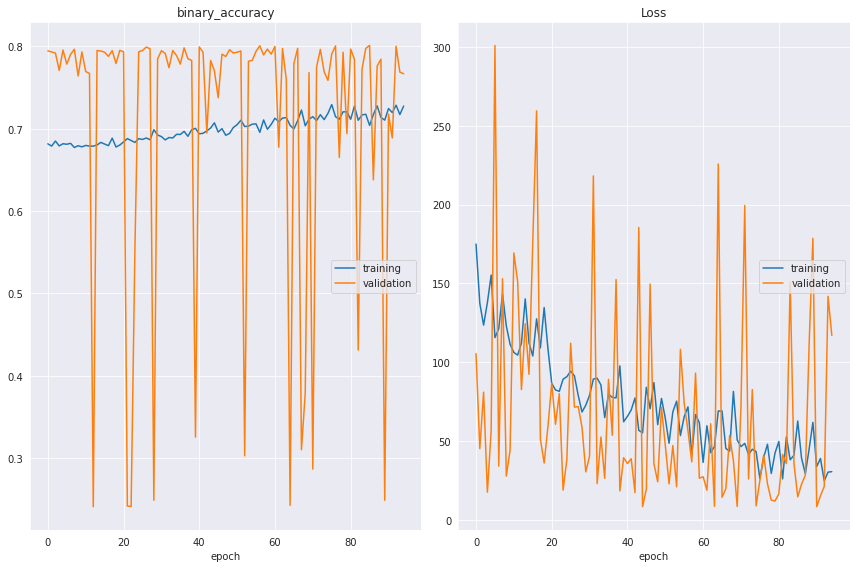

binary_accuracy
	training         	 (min:    0.677, max:    0.729, cur:    0.728)
	validation       	 (min:    0.241, max:    0.801, cur:    0.767)
Loss
	training         	 (min:   24.719, max:  174.894, cur:   30.525)
	validation       	 (min:    8.266, max:  300.949, cur:  117.018)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 3841)]       0           []                               
                                                                                                  
 hidden1_1792 (Dense)           (None, 1792)         6884864     ['input[0][0]']                  
                                                                                                  
 activation1_sigmoid (Activatio  (None, 1792)        0           ['hidden1_1792[0][0]']           
 n)    

AttributeError: 'tuple' object has no attribute 'numpy'

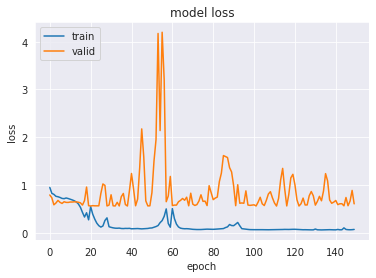

In [29]:
real_world_preprocessing_to_evaluation(config_train_network_adult, X_data_adult, y_data_adult, nominal_features_adult, ordinal_features_adult)

## Titanic Dataset

In [ ]:
titanic_data = pd.read_csv("./real_world_datasets/Titanic/train.csv")

titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace = True)
    
titanic_data['Embarked'].fillna('S', inplace = True)

features_select = [
                    #'Cabin', 
                    #'Ticket', 
                    #'Name', 
                    #'PassengerId'    
                    'Sex',    
                    'Embarked',oo
                    'Pclass',
                    'Age',
                    'SibSp',    
                    'Parch',
                    'Fare',    
                    'Survived',    
                  ]

titanic_data = titanic_data[features_select]

nominal_features_titanic = ['Embarked']#[1, 2, 7]
ordinal_features_titanic = ['Sex']
    
X_data_titanic = titanic_data.drop(['Survived'], axis = 1)
y_data_titanic = titanic_data['Survived']


    survival	Survival	0 = No, 1 = Yes
    pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex	Sex	
    Age	Age in years	
    sibsp	# of siblings / spouses aboard the Titanic	
    parch	# of parents / children aboard the Titanic	
    ticket	Ticket number	
    fare	Passenger fare	
    cabin	Cabin number	
    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
config_train_network_titanic = deepcopy(config)
real_world_preprocessing_to_evaluation(config_train_network_titanic, X_data_titanic, y_data_titanic, nominal_features_titanic, ordinal_features_titanic)

## Absenteeism at Work Dataset

In [ ]:
absenteeism_data = pd.read_csv('real_world_datasets/Absenteeism/absenteeism.csv', delimiter=';')

features_select = [
                           'Disciplinary failure', #CATEGORICAL
                           'Social drinker', #CATEGORICAL
                           'Social smoker', #CATEGORICAL
                           'Transportation expense', 
                           'Distance from Residence to Work',
                           'Service time', 
                           'Age', 
                           'Work load Average/day ', 
                           'Hit target',
                           'Education', 
                           'Son', 
                           'Pet', 
                           'Weight', 
                           'Height', 
                           'Body mass index', 
                           'Absenteeism time in hours'
                        ]

absenteeism_data = absenteeism_data[features_select]

nominal_features_absenteeism = []
ordinal_features_absenteeism = []
    
X_data_absenteeism = absenteeism_data.drop(['Absenteeism time in hours'], axis = 1)
y_data_absenteeism = ((absenteeism_data['Absenteeism time in hours'] > 4) * 1) #absenteeism_data['Absenteeism time in hours']


In [ ]:
config_train_network_absenteeism = deepcopy(config)
real_world_preprocessing_to_evaluation(config_train_network_absenteeism, X_data_absenteeism, y_data_absenteeism, nominal_features_absenteeism, ordinal_features_absenteeism)

    3. Month of absence
    4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
    5. Seasons (summer (1), autumn (2), winter (3), spring (4))
    6. Transportation expense
    7. Distance from Residence to Work (kilometers)
    8. Service time
    9. Age
    10. Work load Average/day
    11. Hit target
    12. Disciplinary failure (yes=1; no=0)
    13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
    14. Son (number of children)
    15. Social drinker (yes=1; no=0)
    16. Social smoker (yes=1; no=0)
    17. Pet (number of pet)
    18. Weight
    19. Height
    20. Body mass index
    21. Absenteeism time in hours (target)

## Loan House

In [ ]:
loan_data = pd.read_csv('real_world_datasets/Loan/loan-train.csv', delimiter=',')

loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean(), inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mean(), inplace=True)

features_select = [
                    #'Loan_ID', 
                    'Gender', #
                    'Married', 
                    'Dependents', 
                    'Education',
                    'Self_Employed', 
                    'ApplicantIncome', 
                    'CoapplicantIncome', 
                    'LoanAmount',
                    'Loan_Amount_Term', 
                    'Credit_History', 
                    'Property_Area', 
                    'Loan_Status'
                    ]

loan_data = loan_data[features_select]

#loan_data['Dependents'][loan_data['Dependents'] == '3+'] = 4
#loan_data['Dependents'] = loan_data['Dependents'].astype(int)

#loan_data['Property_Area'][loan_data['Property_Area'] == 'Rural'] = 0
#loan_data['Property_Area'][loan_data['Property_Area'] == 'Semiurban'] = 1
#loan_data['Property_Area'][loan_data['Property_Area'] == 'Urban'] = 2
#loan_data['Property_Area'] = loan_data['Property_Area'].astype(int)

nominal_features_loan = [
                        'Dependents',
                        'Property_Area',    
                        ]


ordinal_features_loan = [
                    'Education',
                    'Gender', 
                    'Married', 
                    'Self_Employed',
                   ]
    
X_data_loan = loan_data.drop(['Loan_Status'], axis = 1)
y_data_loan = ((loan_data['Loan_Status'] == 'Y') * 1) 

In [ ]:
config_train_network_loan_house = deepcopy(config)
#config_train_network_loan_house['lambda_net']['batch_lambda'] = 64#16
#config_train_network_loan_house['lambda_net']['learning_rate_lambda'] = 0.001
#config_train_network_loan_house['lambda_net']['dropout_lambda'] = 0#.1
#config_train_network_loan_house['lambda_net']['epochs_lambda'] = 500
#config_train_network_loan_house['lambda_net']['optimizer_lambda'] = 'adam'


In [ ]:
real_world_preprocessing_to_evaluation(config_train_network_loan_house, X_data_loan, y_data_loan, nominal_features_loan, ordinal_features_loan)

## Loan Credit

In [ ]:
loan_credit_data = pd.read_csv('real_world_datasets/Credit Loan/train_split.csv', delimiter=',')

loan_credit_data['emp_title'].fillna(loan_credit_data['emp_title'].mode()[0], inplace=True)
loan_credit_data['emp_length'].fillna(loan_credit_data['emp_length'].mode()[0], inplace=True)
#loan_credit_data['desc'].fillna(loan_credit_data['desc'].mode()[0], inplace=True)
loan_credit_data['title'].fillna(loan_credit_data['title'].mode()[0], inplace=True)
#loan_credit_data['mths_since_last_delinq'].fillna(loan_credit_data['mths_since_last_delinq'].mode()[0], inplace=True)
#loan_credit_data['mths_since_last_record'].fillna(loan_credit_data['mths_since_last_record'].mode()[0], inplace=True)
loan_credit_data['revol_util'].fillna(loan_credit_data['revol_util'].mode()[0], inplace=True)
loan_credit_data['collections_12_mths_ex_med'].fillna(loan_credit_data['collections_12_mths_ex_med'].mode()[0], inplace=True)
#loan_credit_data['mths_since_last_major_derog'].fillna(loan_credit_data['mths_since_last_major_derog'].mode()[0], inplace=True)
#loan_credit_data['verification_status_joint'].fillna(loan_credit_data['verification_status_joint'].mode()[0], inplace=True)
loan_credit_data['tot_coll_amt'].fillna(loan_credit_data['tot_coll_amt'].mode()[0], inplace=True)
loan_credit_data['tot_cur_bal'].fillna(loan_credit_data['tot_cur_bal'].mode()[0], inplace=True)
loan_credit_data['total_rev_hi_lim'].fillna(loan_credit_data['total_rev_hi_lim'].mode()[0], inplace=True)


##remove too many null
#'mths_since_last_delinq','mths_since_last_record', 'mths_since_last_major_derog','pymnt_plan','desc', 'verification_status_joint'


features_select = [
                    #'member_id', 
                    'loan_amnt', 
                    'funded_amnt', 
                    'funded_amnt_inv', 
                    'term',
                    #'batch_enrolled',
                    'int_rate', 
                    'grade', 
                    #'sub_grade', 
                    #'emp_title',
                    'emp_length',
                    'home_ownership', 
                    'annual_inc', 
                    'verification_status',
                    #'pymnt_plan', 
                    #'desc', 
                    'purpose', 
                    'title', 
                    #'zip_code', 
                    #'addr_state',
                    'dti', 
                    'delinq_2yrs', 
                    'inq_last_6mths', 
                    #'mths_since_last_delinq',
                    #'mths_since_last_record',
                    'open_acc', 
                    'pub_rec', 
                    'revol_bal',
                    'revol_util', 
                    'total_acc', 
                    'initial_list_status', 
                    'total_rec_int',
                    'total_rec_late_fee', 
                    'recoveries', 
                    'collection_recovery_fee',
                    'collections_12_mths_ex_med', 
                    #'mths_since_last_major_derog',
                    'application_type', 
                    #'verification_status_joint', 
                    'last_week_pay',
                    'acc_now_delinq', 
                    'tot_coll_amt', 
                    'tot_cur_bal', 
                    'total_rev_hi_lim',
                    'loan_status'
                    ]

loan_credit_data = loan_credit_data[features_select]

nominal_features_loan_credit = [

                        ]
ordinal_features_loan_credit = [
                    #'member_id', 
                    'loan_amnt', 
                    'funded_amnt', 
                    'funded_amnt_inv', 
                    'term',
                    #'batch_enrolled',
                    'int_rate', 
                    'grade', 
                    #'sub_grade', 
                    #'emp_title',
                    'emp_length',
                    'home_ownership', 
                    'annual_inc', 
                    'verification_status',
                    #'pymnt_plan', 
                    #'desc', 
                    'purpose', 
                    'title', 
                    #'zip_code', 
                    #'addr_state',
                    'dti', 
                    'delinq_2yrs', 
                    'inq_last_6mths', 
                    #'mths_since_last_delinq',
                    #'mths_since_last_record',
                    'open_acc', 
                    'pub_rec', 
                    'revol_bal',
                    'revol_util', 
                    'total_acc', 
                    'initial_list_status', 
                    'total_rec_int',
                    'total_rec_late_fee', 
                    'recoveries', 
                    'collection_recovery_fee',
                    'collections_12_mths_ex_med', 
                    #'mths_since_last_major_derog',
                    'application_type', 
                    #'verification_status_joint', 
                    'last_week_pay',
                    'acc_now_delinq', 
                    'tot_coll_amt', 
                    'tot_cur_bal', 
                    'total_rev_hi_lim',
                   ]
    
X_data_loan_credit = loan_credit_data.drop(['loan_status'], axis = 1)
y_data_loan_credit = pd.Series(OrdinalEncoder().fit_transform(loan_credit_data['loan_status'].values.reshape(-1, 1)).flatten(), name='loan_status')


In [ ]:
config_train_network_loan_credit = deepcopy(config)
real_world_preprocessing_to_evaluation(config_train_network_loan_credit, X_data_loan_credit, y_data_loan_credit, nominal_features_loan_credit, ordinal_features_loan_credit)

## Medical Insurance

In [ ]:
medical_insurance_data = pd.read_csv('real_world_datasets/Medical Insurance/insurance.csv', delimiter=',')

features_select = [
                    'age', 
                    'sex', 
                    'bmi', 
                    'children', 
                    'smoker',
                    'region',
                    'charges'
                    ]

medical_insurance_data = medical_insurance_data[features_select]

nominal_features_medical_insurance = [
                    'region',
                        ]
ordinal_features_medical_insurance = [
                    'sex',
                    'smoker'
                   ]

    
X_data_medical_insurance = medical_insurance_data.drop(['charges'], axis = 1)
y_data_medical_insurance = ((medical_insurance_data['charges'] > 10_000) * 1)

X_data_medical_insurance.head()


In [ ]:
config_train_network_medical_insurance = deepcopy(config)
real_world_preprocessing_to_evaluation(config_train_network_medical_insurance, X_data_medical_insurance, y_data_medical_insurance, nominal_features_medical_insurance, ordinal_features_medical_insurance)

## Bank Marketing

In [ ]:
bank_data = pd.read_csv('real_world_datasets/Bank Marketing/bank-full.csv', delimiter=';') #bank

features_select = [
                    'age',
                    'job', 
                    'marital', 
                    'education', 
                    'default',
                    'housing',
                    'loan',
                    #'contact',
                    #'day',
                    #'month',
                    'duration',
                    'campaign',
                    'pdays',
                    'previous',
                    'poutcome',
                    'y',
                    ]

bank_data = bank_data[features_select]

nominal_features_bank = [
                        'job',
                        'education',
                        #'contact',
                        #'day',
                        #'month',
                        'poutcome',
                        ]
ordinal_features_bank = [
                    'marital',
                    'default',
                    'housing',
                    'loan',
                   ]

    
X_data_bank = bank_data.drop(['y'], axis = 1)
y_data_bank = pd.Series(OrdinalEncoder().fit_transform(bank_data['y'].values.reshape(-1, 1)).flatten(), name='y')


In [ ]:
config_train_network_bank = deepcopy(config)
real_world_preprocessing_to_evaluation(config_train_network_bank, X_data_bank, y_data_bank, nominal_features_bank, ordinal_features_bank)

## Cervical cancer (Risk Factors) Data Set

In [ ]:
cc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv', index_col=False)#, names=feature_names

features_select = [
                    'Age',
                    'Number of sexual partners',
                    'First sexual intercourse',
                    'Num of pregnancies',
                    'Smokes',
                    'Smokes (years)',
                    'Hormonal Contraceptives',
                    'Hormonal Contraceptives (years)',
                    'IUD',
                    'IUD (years)',
                    'STDs',
                    'STDs (number)',
                    'STDs: Number of diagnosis',
                    'STDs: Time since first diagnosis',
                    'STDs: Time since last diagnosis',
                    'Biopsy'
                    ]

cc_data = cc_data[features_select]

cc_data['Number of sexual partners'][cc_data['Number of sexual partners'] == '?'] = cc_data['Number of sexual partners'].mode()[0]
cc_data['First sexual intercourse'][cc_data['First sexual intercourse'] == '?'] = cc_data['First sexual intercourse'].mode()[0]
cc_data['Num of pregnancies'][cc_data['Num of pregnancies'] == '?'] = cc_data['Num of pregnancies'].mode()[0]
cc_data['Smokes'][cc_data['Smokes'] == '?'] = cc_data['Smokes'].mode()[0]
cc_data['Smokes (years)'][cc_data['Smokes (years)'] == '?'] = cc_data['Smokes (years)'].mode()[0]
cc_data['Hormonal Contraceptives'][cc_data['Hormonal Contraceptives'] == '?'] = cc_data['Hormonal Contraceptives'].mode()[0]
cc_data['Hormonal Contraceptives (years)'][cc_data['Hormonal Contraceptives (years)'] == '?'] = cc_data['Hormonal Contraceptives (years)'].mode()[0]
cc_data['IUD'][cc_data['IUD'] == '?'] = cc_data['IUD'].mode()[0]
cc_data['IUD (years)'][cc_data['IUD (years)'] == '?'] = cc_data['IUD (years)'].mode()[0]
cc_data['STDs'][cc_data['STDs'] == '?'] = cc_data['STDs'].mode()[0]
cc_data['STDs (number)'][cc_data['STDs (number)'] == '?'] = cc_data['STDs (number)'].mode()[0]
cc_data['STDs: Time since first diagnosis'][cc_data['STDs: Time since first diagnosis'] == '?'] = cc_data['STDs: Time since first diagnosis'][cc_data['STDs: Time since first diagnosis'] != '?'].mode()[0]
cc_data['STDs: Time since last diagnosis'][cc_data['STDs: Time since last diagnosis'] == '?'] = cc_data['STDs: Time since last diagnosis'][cc_data['STDs: Time since last diagnosis'] != '?'].mode()[0]

nominal_features_cc = [
                        ]
ordinal_features_cc = [
                   ]

    
X_data_cc = cc_data.drop(['Biopsy'], axis = 1)
y_data_cc = pd.Series(OrdinalEncoder().fit_transform(cc_data['Biopsy'].values.reshape(-1, 1)).flatten(), name='Biopsy')


In [ ]:
config_train_network_cc = deepcopy(config)
real_world_preprocessing_to_evaluation(config_train_network_cc, X_data_cc, y_data_cc, nominal_features_cc, ordinal_features_cc)

## Brest Cancer Wisconsin

In [ ]:
feature_names = [
                'Sample code number',
                'Clump Thickness',
                'Uniformity of Cell Size',
                'Uniformity of Cell Shape',
                'Marginal Adhesion',
                'Single Epithelial Cell Size',
                'Bare Nuclei',
                'Bland Chromatin',
                'Normal Nucleoli',
                'Mitoses',
                'Class',
                ]

bcw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names=feature_names, index_col=False)

bcw_data['Clump Thickness'][bcw_data['Clump Thickness'] == '?'] = bcw_data['Clump Thickness'].mode()[0]
bcw_data['Uniformity of Cell Size'][bcw_data['Uniformity of Cell Size'] == '?'] = bcw_data['Uniformity of Cell Size'].mode()[0]
bcw_data['Uniformity of Cell Shape'][bcw_data['Uniformity of Cell Shape'] == '?'] = bcw_data['Uniformity of Cell Shape'].mode()[0]
bcw_data['Marginal Adhesion'][bcw_data['Marginal Adhesion'] == '?'] = bcw_data['Marginal Adhesion'].mode()[0]
bcw_data['Single Epithelial Cell Size'][bcw_data['Single Epithelial Cell Size'] == '?'] = bcw_data['Single Epithelial Cell Size'].mode()[0]
bcw_data['Bare Nuclei'][bcw_data['Bare Nuclei'] == '?'] = bcw_data['Bare Nuclei'].mode()[0]
bcw_data['Bland Chromatin'][bcw_data['Bland Chromatin'] == '?'] = bcw_data['Bland Chromatin'].mode()[0]
bcw_data['Normal Nucleoli'][bcw_data['Normal Nucleoli'] == '?'] = bcw_data['Normal Nucleoli'].mode()[0]
bcw_data['Mitoses'][bcw_data['Mitoses'] == '?'] = bcw_data['Mitoses'].mode()[0]

features_select = [
                #'Sample code number',
                'Clump Thickness',
                'Uniformity of Cell Size',
                'Uniformity of Cell Shape',
                'Marginal Adhesion',
                'Single Epithelial Cell Size',
                'Bare Nuclei',
                'Bland Chromatin',
                'Normal Nucleoli',
                'Mitoses',
                'Class',
                    ]

bcw_data = bcw_data[features_select]

nominal_features_bcw = [
                        ]
ordinal_features_bcw = [
                   ]

    
X_data_bcw = bcw_data.drop(['Class'], axis = 1)
y_data_bcw = pd.Series(OrdinalEncoder().fit_transform(bcw_data['Class'].values.reshape(-1, 1)).flatten(), name='Class')


In [ ]:
config_train_network_bcw = deepcopy(config)
real_world_preprocessing_to_evaluation(config_train_network_bcw, X_data_bcw, y_data_bcw, nominal_features_bcw, ordinal_features_bcw)

## Wisconsin Diagnostic Breast Cancer

In [ ]:
feature_names = [
                'ID number',
                'Diagnosis',
                'radius',# (mean of distances from center to points on the perimeter)
                'texture',# (standard deviation of gray-scale values)
                'perimeter',
                'area',
                'smoothness',# (local variation in radius lengths)
                'compactness',# (perimeter^2 / area - 1.0)
                'concavity',# (severity of concave portions of the contour)
                'concave points',# (number of concave portions of the contour)
                'symmetry',
                'fractal dimension',# ("coastline approximation" - 1)
                ]
#Wisconsin Diagnostic Breast Cancer
wdbc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', names=feature_names, index_col=False)

features_select = [
                    #'ID number',
                    'Diagnosis',
                    'radius',# (mean of distances from center to points on the perimeter)
                    'texture',# (standard deviation of gray-scale values)
                    'perimeter',
                    'area',
                    'smoothness',# (local variation in radius lengths)
                    'compactness',# (perimeter^2 / area - 1.0)
                    'concavity',# (severity of concave portions of the contour)
                    'concave points',# (number of concave portions of the contour)
                    'symmetry',
                    'fractal dimension',# ("coastline approximation" - 1)
                    ]

wdbc_data = wdbc_data[features_select]

nominal_features_wdbc = [
                        ]
ordinal_features_wdbc = [
                   ]

    
X_data_wdbc = wdbc_data.drop(['Diagnosis'], axis = 1)
y_data_wdbc= pd.Series(OrdinalEncoder().fit_transform(wdbc_data['Diagnosis'].values.reshape(-1, 1)).flatten(), name='Diagnosis')


In [ ]:
config_train_network_wdbc = deepcopy(config)
real_world_preprocessing_to_evaluation(config_train_network_wdbc, X_data_wdbc, y_data_wdbc, nominal_features_wdbc, ordinal_features_wdbc)

## Wisconsin Prognostic Breast Cancer

In [ ]:
feature_names = [
                'ID number',
                'Diagnosis',
                'radius',# (mean of distances from center to points on the perimeter)
                'texture',# (standard deviation of gray-scale values)
                'perimeter',
                'area',
                'smoothness',# (local variation in radius lengths)
                'compactness',# (perimeter^2 / area - 1.0)
                'concavity',# (severity of concave portions of the contour)
                'concave points',# (number of concave portions of the contour)
                'symmetry',
                'fractal dimension',# ("coastline approximation" - 1)
                ]
#Wisconsin Prognostic Breast Cancer
wpbc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data', names=feature_names, index_col=False)

features_select = [
                    #'ID number',
                    'Diagnosis',
                    'radius',# (mean of distances from center to points on the perimeter)
                    'texture',# (standard deviation of gray-scale values)
                    'perimeter',
                    'area',
                    'smoothness',# (local variation in radius lengths)
                    'compactness',# (perimeter^2 / area - 1.0)
                    'concavity',# (severity of concave portions of the contour)
                    'concave points',# (number of concave portions of the contour)
                    'symmetry',
                    'fractal dimension',# ("coastline approximation" - 1)
                    ]

wpbc_data = wpbc_data[features_select]

nominal_features_wpbc = [
                        ]
ordinal_features_wpbc = [
                   ]
 
X_data_wpbc = wpbc_data.drop(['Diagnosis'], axis = 1)
y_data_wpbc= pd.Series(OrdinalEncoder().fit_transform(wpbc_data['Diagnosis'].values.reshape(-1, 1)).flatten(), name='Diagnosis')


In [ ]:
config_train_network_wpbc = deepcopy(config)
real_world_preprocessing_to_evaluation(config_train_network_wpbc, X_data_wpbc, y_data_wpbc, nominal_features_wpbc, ordinal_features_wpbc)

## Abalone

In [ ]:
feature_names = [
                'Sex',#		nominal			M, F, and I (infant)
                'Length',#	continuous	mm	Longest shell measurement
                'Diameter',#	continuous	mm	perpendicular to length
                'Height',#		continuous	mm	with meat in shell
                'Whole weight',#	continuous	grams	whole abalone
                'Shucked weight',#	continuous	grams	weight of meat
                'Viscera weight',#	continuous	grams	gut weight (after bleeding)
                'Shell weight',#	continuous	grams	after being dried
                'Rings',#		integer			+1.5 gives the age in years
                ]

abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=feature_names, index_col=False)


features_select = [
                'Sex',#		nominal			M, F, and I (infant)
                'Length',#	continuous	mm	Longest shell measurement
                'Diameter',#	continuous	mm	perpendicular to length
                'Height',#		continuous	mm	with meat in shell
                'Whole weight',#	continuous	grams	whole abalone
                'Shucked weight',#	continuous	grams	weight of meat
                'Viscera weight',#	continuous	grams	gut weight (after bleeding)
                'Shell weight',#	continuous	grams	after being dried
                'Rings',#		integer			+1.5 gives the age in years
                    ]

abalone_data = abalone_data[features_select]

nominal_features_abalone = [
                        'Sex',
                        ]
ordinal_features_abalone = [
                   ]
   
X_data_abalone = abalone_data.drop(['Rings'], axis = 1)
y_data_abalone = ((abalone_data['Rings'] > 10) * 1)
    

In [ ]:
config_train_network_abalone = deepcopy(config)
real_world_preprocessing_to_evaluation(config_train_network_abalone, X_data_abalone, y_data_abalone, nominal_features_abalone, ordinal_features_abalone)

## Car

In [ ]:
feature_names = [
   'buying',#       v-high, high, med, low
   'maint',#        v-high, high, med, low
   'doors',#        2, 3, 4, 5-more
   'persons',#      2, 4, more
   'lug_boot',#     small, med, big
   'safety',#       low, med, high
   'class',#        unacc, acc, good, v-good
                ]

car_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=feature_names, index_col=False)

features_select = [
                   'buying',#       v-high, high, med, low
                   'maint',#        v-high, high, med, low
                   'doors',#        2, 3, 4, 5-more
                   'persons',#      2, 4, more
                   'lug_boot',#     small, med, big
                   'safety',#       low, med, high
                   'class',#        unacc, acc, good, v-good
                    ]

car_data = car_data[features_select]

nominal_features_car = [
                       'buying',#       v-high, high, med, low
                       'maint',#        v-high, high, med, low
                       'doors',#        2, 3, 4, 5-more
                       'persons',#      2, 4, more
                       'lug_boot',#     small, med, big
                       'safety',#       low, med, high
                        ]

ordinal_features_car = [
                   ]


    
X_data_car = car_data.drop(['class'], axis = 1)
y_data_car = ((car_data['class'] != 'unacc') * 1)

In [ ]:
config_train_network_car = deepcopy(config)
real_world_preprocessing_to_evaluation(config_train_network_car, X_data_car, y_data_car, nominal_features_car, ordinal_features_car)